In [1]:
'''Notebook to demonstrate basic EDA with Pandas'''

'Notebook to demonstrate basic EDA with Pandas'

In [2]:
import pandas as pd

In [206]:
# Read CSV into pandas dataframe
df = pd.read_csv('sample_tweets.csv', encoding='iso-8859-1')

In [4]:
# Look at columns. Rows are automatically indexed
df.columns

Index(['polarity', 'text'], dtype='object')

In [5]:
# Look at shape - doesn't include header row. 
# We have 49999 tweets (rows), and 2 columns
df.shape

(4999, 2)

In [7]:
# View head and tail
df
df.head(500)
df.tail(3)

,polarity,text
4996,0,a friend broke his promises..
4997,0,@gjarnling I am fine thanks - tired
4998,0,trying to keep my eyes open..damn baking


In [9]:
# Data is stored in dataframe
type(df)

pandas.core.frame.DataFrame

In [12]:
# Columns can be accessed using dot notation or standard dictionary indexing
df.text
df['text'].head(5)

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [13]:
# Each column is a pandas 
type(df.text)

pandas.core.series.Series

In [19]:
# Classic python string operations can be performed on series
df.text.str.strip().head(5)

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [20]:
# String operations can be chained
df.text.str.strip().str.lower().head(5)

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3       my whole body feels itchy and like its on fire
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [21]:
# Display the number of characters in each tweet
df.text.str.len().head(5)

0    115
1    111
2     89
3     47
4    111
Name: text, dtype: int64

In [27]:
# Create simple regex for a mention
import re
mention = re.compile('@\w+')
match = re.match(mention, '@kanyewest')
match.group()

'@kanyewest'

In [33]:
# Now find mentions within tweets.
# Pandas will dispaly NaN when it doesn't find a mention in the tweet
df.text.str.extract('(@\w+)', expand=True).head(10)

,0
0,@switchfoot
1,NaN
2,@Kenichan
3,NaN
4,@nationwideclass
5,@Kwesidei
6,NaN
7,@LOLTrish
8,@Tatiana_K
9,@twittera


In [44]:
# Get rid of NaN values
mentions = df.text.str.extract('(@\w+)', expand=True).head(10)
mentions.dropna()

,0
0,@switchfoot
2,@Kenichan
4,@nationwideclass
5,@Kwesidei
7,@LOLTrish
8,@Tatiana_K
9,@twittera


In [47]:
# Build a better regex

# Good
re.match(mention, '@kanyewest').group()

# Breaks - does not find mention
re.match(mention, 'sup @kanyewest?')

# Breaks - finds mention, but this is an email
re.match(mention, 'omari@kanyewest?')

In [53]:
# Second try: let's negate anything that directly
# precedes the mention to avoid emails, and allow
# for the possibility that there are word in front
# of the hashtag.
better_mention = re.compile(r'^(.*\s)?@\w+')

def test_regex(r):
    test1 = '@kanyewest'
    test2 = 'sup @kanyewest'
    test3 = 'HELLO @kenywest!'
    test4 = 'omari@kanywest.com'
    
    assert re.match(r, test1) is not None
    assert re.match(r, test2) is not None
    assert re.match(r, test3) is not None
    assert re.match(r, test4) is None

# test_regex(mention)
test_regex(better_mention)

In [55]:
# Search vs. match

# Check for match at the beginning of the string
re.match('c', 'abcdef')

In [56]:
# Check for match anywhere in the string
re.search('c', 'abcedf')

<_sre.SRE_Match object; span=(2, 3), match='c'>

In [59]:
# Get tweets with mentions: two ways

# Corresponds to re.match and returns groups
df.text.str.match(better_mention).head(3)

/Users/morgane/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.


0    (None,)
1         []
2    (None,)
Name: text, dtype: object

In [60]:
# Corresponds to re.search and returns true or false
df.text.str.contains(better_mention).head(3)

/Users/morgane/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


0     True
1    False
2     True
Name: text, dtype: bool

In [61]:
# Number of tweets that contain mentions
df.text.str.contains(better_mention).value_counts()

/Users/morgane/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


False    3219
True     1780
Name: text, dtype: int64

In [67]:
# Percentage of tweets with mentions
num_mentions = df.text.str.contains(better_mention).value_counts()[1]
num_mentions / df.size

/Users/morgane/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


0.17803560712142427

In [70]:
# What about the number of mentions per tweet?
mentions_per_tweet = df.text.str.count(better_mention)
mentions_per_tweet.head(10)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: text, dtype: int64

In [71]:
# Average number of mentions per tweet
mentions_per_tweet.mean()

0.35607121424284854

In [72]:
# Median number of mentions per tweet
mentions_per_tweet.median()

0.0

In [73]:
# Get a quick statistical description of this column's data
# Includes mean, standard deviation, min, max, top/bottom 25%
# of the data, and the median (50% quantile)
mentions_per_tweet.describe()

count    4999.000000
mean        0.356071
std         0.478885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: text, dtype: float64

In [76]:
# Compute distribution of mentions per tweet
# Not very interesting
mentions_per_tweet.value_counts()

0    3219
1    1780
Name: text, dtype: int64

In [79]:
# PLOTTING! 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [84]:
# Let's plot the uninteresting distribution
type(mentions_per_tweet.value_counts())

pandas.core.series.Series

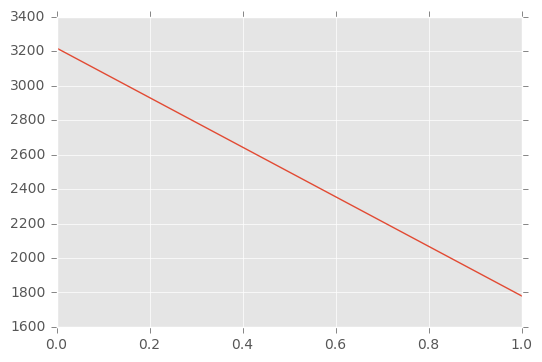

In [91]:
# Plotting a series: default is line plot.
mention_distribution = mentions_per_tweet.value_counts()
# Doesn't really make sense for our case.
mention_distribution.plot()

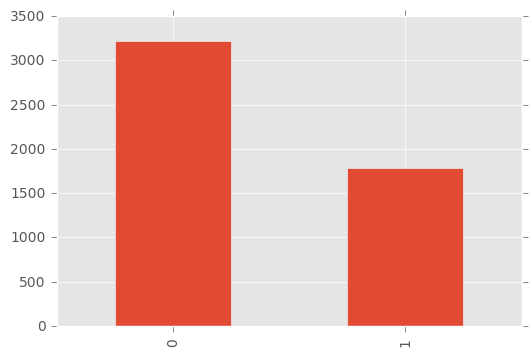

In [92]:
# We want a bar chart
mention_distribution.plot(kind='bar')

In [158]:
# A histogram could technically work too. Bar charts are for categorical data representations
# Histograms display distribution of data along a continuous numeric axis.

# Naive way - gives us the actual frequency on the x-axis
# But we want frequency of occurrences on the y-axis
# mention_distribution.plot(kind='hist')

# .plot(kind='hist') or .plot.hist() or .hist() takes
# a series and automatically bins it and plots it.
# df.text.str.count(better_mention)
# TODO idk why this isn't working

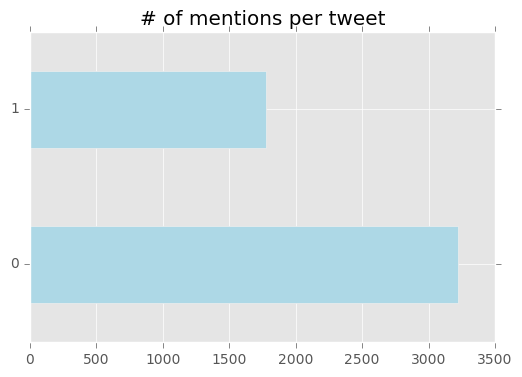

In [97]:
# Horizontal bar chart with title
mention_distribution.plot(kind='barh', title='# of mentions per tweet', color='lightblue')

In [172]:
# Let's isolate this functionality so we can look at other patterns
def pattern_distribution(pattern, nbins):
    pattern_per_tweet = s.str.count(pattern)
    print('Average occurrence of pattern in tweet:', pattern_per_tweet.mean())
    distribution = pattern_per_tweet.value_counts()
    print('Distribution:')
    print(distribution)
    # Plot histogram
    pattern_per_tweet.plot.hist(bins=nbins, color='orange')

Average occurrence of pattern in tweet: 0.3008601720344069
Distribution:
0     3819
1      927
2      207
3       36
4        6
11       1
6        1
9        1
5        1
Name: text, dtype: int64


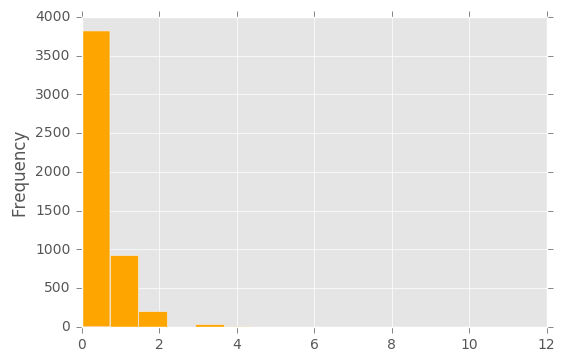

In [173]:
# Find distribution of exclamation points per tweet
# Adjust granularity with number of bins
pattern_distribution(r'!+', 15)

Average occurrence of pattern in tweet: 0.017003400680136026
Distribution:
0    4928
1      60
2       8
3       3
Name: text, dtype: int64


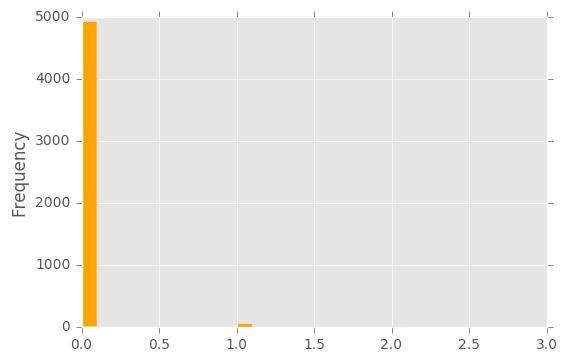

In [176]:
# Find distribution of hashtags per tweet
pattern_distribution(r'#\w+', 30)

75.28585717143429


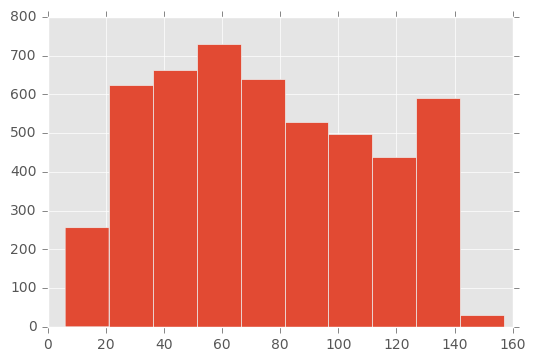

In [179]:
# Find distribution of tweet length
df.text.str.len().hist()
print(df.text.str.len().mean())

In [190]:
# We can perform familiar operations on series
(df.text.str.len() > 100).head(10)

0     True
1     True
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [208]:
# Number of tweets that are longer than 100 characters?
df.text.where(df.text.str.len() > 100).dropna().size

2801

In [209]:
# Let's look at sentiment: what we want to predict
df.polarity.value_counts()

4    5000
0    4999
Name: polarity, dtype: int64

In [212]:
# Grab only happy tweets
df.polarity[df.polarity == 4].head(5)

4999    4
5000    4
5001    4
5002    4
5003    4
Name: polarity, dtype: int64

In [213]:
# Grab only sad tweets
df.polarity[df.polarity == 0].head(5)

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

In [222]:
# Group tweets by sentiment
groups = df.groupby('polarity')
groups.count()

,text
polarity,
0,4999
4,5000


In [234]:
# Complex grouping - group by multiple levels

# Let's add a column to our dataset: has_hashtag and has_mention
df_copy = df.copy()
df_copy['has_hashtag'] = df.text.str.contains('#\w+')
df_copy['has_mention'] = df.text.str.contains('@\w+')
df_copy.head(10)

,polarity,text,has_hashtag,has_mention
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False,True
1,0,is upset that he can't update his Facebook by ...,False,False
2,0,@Kenichan I dived many times for the ball. Man...,False,True
3,0,my whole body feels itchy and like its on fire,False,False
4,0,"@nationwideclass no, it's not behaving at all....",False,True
5,0,@Kwesidei not the whole crew,False,True
6,0,Need a hug,False,False
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,False,True
8,0,@Tatiana_K nope they didn't have it,False,True
9,0,@twittera que me muera ?,False,True


In [239]:
# Now we can group by sentiment and has_hashtag
complex_groups = df_copy.groupby(['polarity', 'has_hashtag', 'has_mention'])
complex_groups.count()

text
polarity has_hashtag has_mention      
0        False       False        3159
                     True         1769
         True        False          57
                     True           14
4        False       False        2122
                     True         2716
         True        False          89
                     True           73

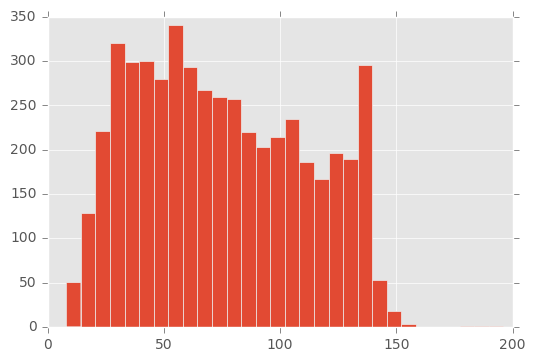

In [241]:
# Now let's see view the distribution of tweet lengths across ONLY happy tweets
happy.text.str.len().hist(bins=30)

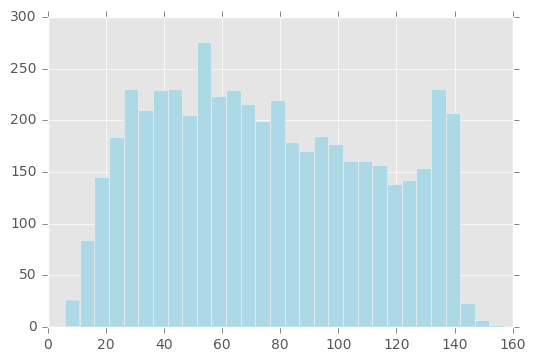

In [243]:
# Distribution of tweet lengths across ONLY sad tweets
sad.text.str.len().hist(bins=30, color='lightblue')

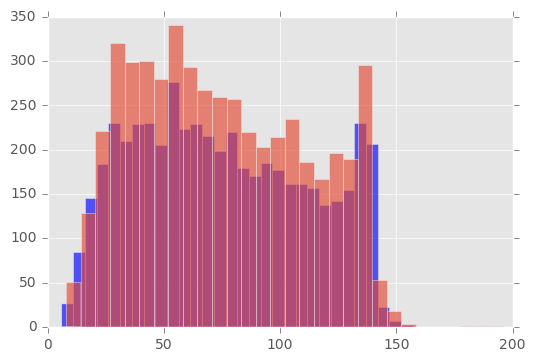

In [250]:
# Let's overlay them to see if there's any difference
# Give the plots some transparency using alpha.
plt.figure();
sad.text.str.len().hist(bins=30, color='blue', alpha=0.65)
happy.text.str.len().hist(bins=30, alpha=0.65)

In [258]:
# Look at most common words in each group

# We'll aggregate results in a counter
from collections import Counter
test = Counter()
test['cat'] = 0
test['dog'] = 0
test

Counter({'cat': 0, 'dog': 0})

In [259]:
test.update({'cat': 5})
test.update({'cat': 1})
test.update(('cat', 2))
test.update(('dog', 2))

# How many in cat?
test['cat']

7

In [262]:
counter = Counter()

# Split each tweet into words
df.text.str.split().head(5)

0    [@switchfoot, http://twitpic.com/2y1zl, -, Aww...
1    [is, upset, that, he, can't, update, his, Face...
2    [@Kenichan, I, dived, many, times, for, the, b...
3    [my, whole, body, feels, itchy, and, like, its...
4    [@nationwideclass, no,, it's, not, behaving, a...
Name: text, dtype: object

In [290]:
# We might want to lower and remove punctuation to
# capture words better

import string
string.punctuation

# I want to keep contractions
punctuation = string.punctuation.replace("'", '')

# Test string
s = 'Hello, I love cats!'

# Python 2.7
# s.translate(None, string.punctuation)

# Python 3.0
# Create mapping from unwanted char to what we want to replace it with
mapping = dict(map(lambda p: (p, ''), list(string.punctuation)))
# Create translation
translator = str.maketrans(mapping)
s.translate(translator)

'Hello I love cats'

In [291]:
# Now let's look at words after cleaning a bit
words = df.text.str.lower().str.translate(translator).str.split()

In [292]:
# Finally let's get an overall count of the words
# Apply takes the output of words and calls counter.update 
# with the words parameters. Javascript people should be
# familiar with this!
words.apply(counter.update)

counter

Counter({'grazie': 2,
         1: 80346,
         'basic': 2,
         'mvp': 2,
         'bananaface': 2,
         'commits': 2,
         'jestdempsey': 2,
         'thankssorry': 2,
         'delivered': 4,
         'feistywoman': 2,
         'motivates': 2,
         'move': 48,
         'owwwee': 2,
         'pumpquot': 2,
         'overheating': 2,
         'affecting': 2,
         'changing': 18,
         'fyreball13': 2,
         'udh': 2,
         'gone': 110,
         'arial': 2,
         'nasi': 2,
         'todayno': 2,
         'picture': 68,
         'khloe': 4,
         'parking': 6,
         'suitcase': 4,
         'polaroid': 2,
         'cmykevin': 2,
         'sooooon': 2,
         'buffet': 2,
         'belgium': 6,
         'onlytosee': 2,
         'shattered': 4,
         'chilli': 2,
         'prosper': 2,
         'yup': 26,
         'robinshen': 2,
         'iwouldificould': 2,
         'coitus': 2,
         'emily': 8,
         'bessey': 2,
         'presentatio

In [293]:
# Now let's look at top words
counter.most_common()

[(1, 80346),
 ('i', 4474),
 ('to', 3678),
 ('the', 3392),
 ('a', 2406),
 ('im', 2082),
 ('and', 1952),
 ('my', 1808),
 ('you', 1693),
 ('is', 1643),
 ('just', 1558),
 ('it', 1481),
 ('for', 1403),
 ('in', 1367),
 ('of', 1192),
 ('good', 1170),
 ('now', 1120),
 ('get', 1110),
 ('day', 1084),
 ('on', 1014),
 ('today', 990),
 ('work', 974),
 ('me', 948),
 ('go', 930),
 ('have', 918),
 ('that', 896),
 ('so', 883),
 ('like', 856),
 ('dont', 828),
 ('but', 819),
 ('going', 784),
 ('cant', 782),
 ('love', 764),
 ('one', 754),
 ('at', 752),
 ('back', 730),
 ('with', 719),
 ('its', 710),
 ('got', 702),
 ('not', 700),
 ('be', 696),
 ('time', 694),
 ('will', 674),
 ('morning', 672),
 ('can', 666),
 ('this', 665),
 ('know', 632),
 ('up', 626),
 ('really', 600),
 ('was', 594),
 ('thanks', 592),
 ('lol', 586),
 ('see', 574),
 ('new', 572),
 ('u', 566),
 ('still', 546),
 ('well', 530),
 ('out', 504),
 ('much', 490),
 ('sleep', 490),
 ('hope', 480),
 ('oh', 480),
 ('want', 478),
 ('are', 476),
 ('amp'

In [294]:
# Are words like "i", "to", "the", "a", "and", useful?
# These are called stopwords -- words that are so common they're usually not meaningful in analysis
from stop_words import get_stop_words

stop_words = get_stop_words('en')

# Create set for faster indexing
stop_words = set(stop_words)

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [296]:
# As we can see, we don't necessarily want to get rid of "'"
counter = Counter()

def add_words(words):
    for word in words:
        if word not in stop_words:
            counter.update((word, 1))

df.text.str.lower().str.translate(translator).str.split().apply(add_words)
counter.most_common()

[(1, 80346),
 ('im', 1041),
 ('just', 779),
 ('good', 585),
 ('now', 560),
 ('get', 555),
 ('day', 542),
 ('today', 495),
 ('work', 487),
 ('go', 465),
 ('like', 428),
 ('dont', 414),
 ('going', 392),
 ('cant', 391),
 ('love', 382),
 ('one', 377),
 ('back', 365),
 ('got', 351),
 ('time', 347),
 ('will', 337),
 ('morning', 336),
 ('can', 333),
 ('know', 316),
 ('really', 300),
 ('thanks', 296),
 ('lol', 293),
 ('see', 287),
 ('new', 286),
 ('u', 283),
 ('still', 273),
 ('well', 265),
 ('much', 245),
 ('sleep', 245),
 ('hope', 240),
 ('oh', 240),
 ('want', 239),
 ('amp', 238),
 ('need', 232),
 ('think', 232),
 ('2', 232),
 ('last', 217),
 ('ill', 215),
 ('twitter', 215),
 ('great', 206),
 ('night', 198),
 ('home', 196),
 ('thats', 186),
 ('miss', 183),
 ('getting', 175),
 ('feel', 175),
 ('haha', 175),
 ('didnt', 171),
 ('happy', 166),
 ('sad', 166),
 ('tomorrow', 165),
 ('bad', 163),
 ('school', 160),
 ('right', 157),
 ('though', 156),
 ('sorry', 151),
 ('way', 151),
 ('ive', 148),
 ('y

In [297]:
# We can already see that these words seem related to sentiment!

In [298]:
# Let's isolate this functionality so that we can do the same thing for positive and negative tweets
def get_most_common_words(tweets):
    counter = Counter()

    def add_words(words):
        for word in words:
            if word not in stop_words:
                counter.update((word, 1))

    tweets.text.str.lower().str.translate(translator).str.split().apply(add_words)
    return counter.most_common()

In [299]:
get_most_common_words(happy)

[(1, 39772),
 ('im', 470),
 ('good', 418),
 ('just', 379),
 ('day', 318),
 ('love', 277),
 ('get', 274),
 ('today', 257),
 ('thanks', 254),
 ('now', 244),
 ('can', 206),
 ('go', 203),
 ('morning', 198),
 ('one', 190),
 ('will', 189),
 ('like', 188),
 ('new', 180),
 ('u', 177),
 ('lol', 170),
 ('going', 168),
 ('see', 167),
 ('know', 162),
 ('time', 161),
 ('back', 160),
 ('great', 154),
 ('got', 154),
 ('work', 152),
 ('well', 149),
 ('dont', 144),
 ('amp', 142),
 ('hope', 132),
 ('happy', 130),
 ('ill', 128),
 ('really', 126),
 ('haha', 121),
 ('think', 118),
 ('2', 114),
 ('twitter', 113),
 ('youre', 105),
 ('thats', 104),
 ('nice', 102),
 ('oh', 98),
 ('much', 97),
 ('cant', 97),
 ('thank', 95),
 ('last', 92),
 ('yeah', 90),
 ('fun', 89),
 ('still', 83),
 ('home', 82),
 ('right', 81),
 ('getting', 81),
 ('awesome', 81),
 ('way', 80),
 ('want', 79),
 ('need', 78),
 ('hey', 75),
 ('best', 74),
 ('yes', 73),
 ('better', 71),
 ('night', 71),
 ('cool', 70),
 ('school', 70),
 ('sure', 69)

In [300]:
get_most_common_words(sad)

[(1, 40574),
 ('im', 571),
 ('just', 400),
 ('work', 335),
 ('now', 316),
 ('cant', 294),
 ('get', 281),
 ('dont', 270),
 ('go', 262),
 ('like', 240),
 ('today', 238),
 ('going', 224),
 ('day', 224),
 ('sleep', 206),
 ('back', 205),
 ('got', 197),
 ('still', 190),
 ('one', 187),
 ('time', 186),
 ('really', 174),
 ('good', 167),
 ('want', 160),
 ('need', 154),
 ('know', 154),
 ('sad', 154),
 ('will', 148),
 ('much', 148),
 ('oh', 142),
 ('morning', 138),
 ('miss', 132),
 ('can', 127),
 ('night', 127),
 ('last', 125),
 ('feel', 124),
 ('lol', 123),
 ('bad', 121),
 ('didnt', 120),
 ('see', 120),
 ('2', 118),
 ('sorry', 117),
 ('well', 116),
 ('think', 114),
 ('home', 114),
 ('hope', 108),
 ('wish', 107),
 ('sick', 106),
 ('u', 106),
 ('new', 106),
 ('love', 105),
 ('twitter', 102),
 ('though', 101),
 ('hate', 101),
 ('tomorrow', 100),
 ('bed', 98),
 ('amp', 96),
 ('getting', 94),
 ('school', 90),
 ('ill', 87),
 ('ive', 85),
 ('feeling', 85),
 ('thats', 82),
 ('find', 81),
 ('even', 78),
 

In [304]:
# They do differ, but there are a lot in common.
# Let's remove the intersection of these lists.

# Example:
A = set([1, 2, 3, 4, 5])
B = set([4, 5, 6, 7, 8])

# Numbers unique to A
A - B

{1, 2, 3}

In [305]:
# Numbers unique to B
B - A

{6, 7, 8}

In [308]:
# Create sets from the top 100 words for happy/sad tweets
top100_happy = set([w for (w, n) in get_most_common_words(happy)[:100]])
top100_sad = set([w for (w, n) in get_most_common_words(sad)[:100]])

In [309]:
# Top words that are unique to happy tweets
top100_happy - top100_sad

{'always',
 'awesome',
 'best',
 'birthday',
 'check',
 'cool',
 'done',
 'everyone',
 'finally',
 'first',
 'happy',
 'hey',
 'little',
 'look',
 'looking',
 'made',
 'nice',
 'please',
 'pretty',
 'ready',
 'say',
 'soon',
 'sure',
 'take',
 'thank',
 'thanks',
 'us',
 'watching',
 'welcome',
 'x',
 'yay',
 'yeah',
 'yes',
 'youre'}

In [310]:
# Top words that are unique to sad tweets
top100_sad - top100_happy

{'3',
 'away',
 'bad',
 'bed',
 'cold',
 'damn',
 'days',
 'doesnt',
 'early',
 'even',
 'feeling',
 'find',
 'hate',
 'hours',
 'isnt',
 'late',
 'long',
 'lost',
 'missed',
 'never',
 'poor',
 'sad',
 'sick',
 'sleep',
 'sorry',
 'thing',
 'tired',
 'trying',
 'ugh',
 'wanna',
 'wish',
 'wont',
 'working',
 'yet'}